<h4> <b> PERCEPTRON </b> </h4>
To work with a single perceptron, we need a single linearly-separable problem. A single perceptron can only predict one linearly-separable problem. Such as- predicting results of AND, OR gates.
<br><br>
In this notebook, we will try to implement a single perceptron that can predict AND, OR logical results. Furthermore, we will learn why XOR logical results cannot be implemented with a single perceptron. Therefore, this will be our basic Neural Network code and the first also. Let's see what we will use, how will we use and why will we use-----

<h4> What will we use: </h4>
    1. We will first define the variables for the logical operations. --> X1 and X2 (lists of binary combination)<br>
    2. Then define the corresponding results for OR, AND logical operations. --> Y_OR, Y_AND (as lists)<br>
    3. Will use Matplotlib libray for ploting the logical results, predicted results and try to implement simulative results (iterative plot on each epoch)<br>
    4. We will also use random library for generating our weight, bias values for the perceptron<br>
    5. We will use the very basic and fundamental steps to build a perceptron:<br>
           <br>              i. Defining random Weights and bias to initially guess the results.
           <br>              ii. Defining a very small step of learning rate for the perceptron to learn by trial and error.
            <br>              iii. Defining a threshold value, which will help the perceptron make a prediction
            <br>              iv. After each prediction, it will able to calculate the error it made predicting the results for each time.<br>
            <b><i><h5>                         error = actual_result - predicted_result</h5></i></b>
            <br>              vi. Based on the error, the value of weights and bias will be changed accordingly. By the time, it will go               near to the perfect value of weights and bias that can predict the logical results correctly.
            <br>              v. The process will repeat until there is no error. Thus, the perceptron will be able to predict the               results correctly.

<h4> How will we use: </h4>
    1. We will use the variables (X1 and X2) to correspond logical results (Y_OR, Y_AND) <br>
    2. After that, we wil try to separately plot the corresponding results for OR & AND <br>
    3. Using, random, we will define an initial random values for both weights and bias. <br>
    4. Finally, we will try to implement the perceptron using the steps mentioned.<br>

<h4> Why will we use: </h4>
    1. X1 and X2 variables would be used for 4 combinations of logical operations<br>
    2. Y_OR and Y_AND will be used to train the perceptron as reference<br>
    3. Learning rate will be used to make the machine learn one at a time. Because, learning step by step is very efficient when complex problems appears. It let the perceptron to analyze the complexity of a problem in a small simple parts <br>
    4. Threshold value is used to make decision on the predicted results. This helps the perceptron to terminate the output, wether it is wrong or right. After applying the threshold to so many combinations of results, the perceptron learns what is more correct <br>
    5. Weights are used to evaluate the importance/relevancy of a variable for the whole calculation. It changes and updates by learning the error it made for each particular variables in every iteration to gradually adjust into the correct results <br>
    6. Bias are used to minimize the risk of getting the same results everytime. Because, when a perceptron learns, it learns from mistakes. For each mistakes, the bias also updates by learning the error.<br>

## Building a Perceptron to predict AND, OR logic results

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [2]:
# Define X1 and X2 for logical operations
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]

# Define Y_OR, Y_AND for training
Y_OR = [0, 1, 1, 1]
Y_AND = [0, 0, 0, 1]

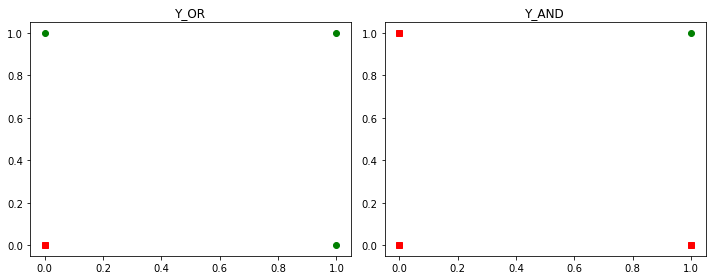

In [3]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot Y_OR
axs[0].set_title('Y_OR')
for i in range(4):
    if Y_OR[i] == 0:
        axs[0].plot(X1[i], X2[i], "rs")
    else:
        axs[0].plot(X1[i], X2[i], "go")

# Plot Y_AND
axs[1].set_title('Y_AND')
for i in range(4):
    if Y_AND[i] == 0:
        axs[1].plot(X1[i], X2[i], "rs")
    else:
        axs[1].plot(X1[i], X2[i], "go")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [4]:
# Initialize Weight and Bias
W = [random.random(), random.random()]  # [W1 and W2]
b = random.random()  # bias

# Set learning_rate and threshold
lr = 0.05
theta = 0.65

print(f"Weights : {W}\nBias : {b}\nLearning Rate : {lr}\nThreshold : {theta}")

Weights : [0.2673814031908679, 0.46086199008543327]
Bias : 0.9351015572608571
Learning Rate : 0.05
Threshold : 0.65


Implementing the perceptron following steps in each loop-
```python
1. Calculate weighted sum and set the prediction to zero
2. Check the weighted sum condition with threshold value and make decision (Activation Function)
3. Calculate the error and check for wether to update the values or progress next
4. Repeat until the loop return 4 counts of correctly predicted results
```

In [5]:
def pred_logic(Y, b):
    # Perceptron for the operations
    epoch = 0
    count = 0

    while count < 4:
        total_error = 0
        print(f"Epoch : {epoch}")
        for i in range(len(X1)):
            ws = W[0]*X1[i] + W[1]*X2[i] + b # W1*X1 + W2*X2 + b
            pred = 0
            if ws > theta:
                pred = 1

            error = Y[i] - pred
            if error != 0:
                count = 0
                total_error += math.sqrt(error**2)
                    # Update the weights and bias
                W[0] += error * X1[i] * lr
                W[1] += error * X2[i] * lr
                b    += error * lr
            else:
                count += 1

            print(f"[{X1[i]} , {X2[i]}] = {pred} / {Y[i]}")

        print(f"Loss: {total_error}")
        print("------------------------------\n")
        epoch += 1

In [6]:
# Choose one at a time
pred_logic(Y_OR, b)
#pred_logic(Y_AND, b)

Epoch : 0
[0 , 0] = 1 / 0
[0 , 1] = 1 / 1
[1 , 0] = 1 / 1
[1 , 1] = 1 / 1
Loss: 1.0
------------------------------

Epoch : 1
[0 , 0] = 1 / 0
[0 , 1] = 1 / 1
[1 , 0] = 1 / 1
[1 , 1] = 1 / 1
Loss: 1.0
------------------------------

Epoch : 2
[0 , 0] = 1 / 0
[0 , 1] = 1 / 1
[1 , 0] = 1 / 1
[1 , 1] = 1 / 1
Loss: 1.0
------------------------------

Epoch : 3
[0 , 0] = 1 / 0
[0 , 1] = 1 / 1
[1 , 0] = 1 / 1
[1 , 1] = 1 / 1
Loss: 1.0
------------------------------

Epoch : 4
[0 , 0] = 1 / 0
[0 , 1] = 1 / 1
[1 , 0] = 1 / 1
[1 , 1] = 1 / 1
Loss: 1.0
------------------------------

Epoch : 5
[0 , 0] = 1 / 0
[0 , 1] = 1 / 1
[1 , 0] = 1 / 1
[1 , 1] = 1 / 1
Loss: 1.0
------------------------------

Epoch : 6
[0 , 0] = 0 / 0
[0 , 1] = 1 / 1
[1 , 0] = 1 / 1
[1 , 1] = 1 / 1
Loss: 0
------------------------------



In [7]:
print("Updated Weights and Bias :\n---------------------------")
print("W1 = ", W[0])
print("W2 = ", W[1])
print("b  = ", b)

Updated Weights and Bias :
---------------------------
W1 =  0.2673814031908679
W2 =  0.46086199008543327
b  =  0.9351015572608571


<h3> Plotting Results with Linear Decision Boundary </h3>

Here we will try to draw a line that will seperate two results, showing the boundary between it.

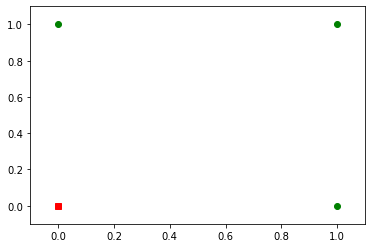

In [8]:
plt.figure()
for i in range(len(Y_OR)):
    if Y_OR[i] == 0:
        plt.plot(X1[i], X2[i], "rs")
    else:
        plt.plot(X1[i], X2[i], "go")

# Calculating x-intercept and y-intercept
# y-intercept is the point where the line intercepts in y-axis.
# x-intercept is the point where the line intercepts in x-axis.
# To calculate it, we will use the W1 in x-axis, and W2 in y-axis.
# Using the difference of the threshold and bias as the measuring point for both axes.

xintr=(theta-b)/W[0]
yintr=(theta-b)/W[1]

slope=-yintr/xintr
xx=plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
yeq = []
for x in xx:
    yeq.append(slope*x+yintr)
plt.plot(xx,yeq)
plt.show()

<h3> Visualizing Every Epoch </h3>

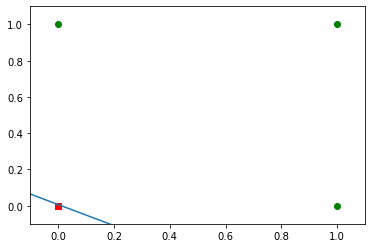

Total Epoch : 65


In [9]:
from IPython import display

def pred_logic(Y, b):
    # Perceptron for the operations
    epoch = 0
    count = 0

    while count < 4:
        lr = 0.0045
        total_error = 0
        print(f"Epoch : {epoch}")
        for i in range(len(X1)):
            ws = W[0]*X1[i] + W[1]*X2[i] + b # W1*X1 + W2*X2 + b
            pred = 0
            if ws > theta:
                pred = 1

            error = Y[i] - pred
            if error != 0:
                count = 0
                total_error += math.sqrt(error**2)
                    # Update the weights and bias
                W[0] += error * X1[i] * lr
                W[1] += error * X2[i] * lr
                b    += error * lr
            else:
                count += 1
        epoch += 1
        
        plt.figure()
        display.clear_output(wait=True)
        for i in range(len(Y_OR)):
            if Y_OR[i] == 0:
                plt.plot(X1[i], X2[i], "rs")
            else:
                plt.plot(X1[i], X2[i], "go")
        plt.xlim([-0.1, 1.1])
        plt.ylim([-0.1, 1.1])

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]
        slope=-yintr/xintr
        
        xx=plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx, yeq)
        plt.show()
        print(f"Total Epoch : {epoch}")

pred_logic(Y_OR, b)